In [1]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
#%pip install ipywidgets
#jupyter labextension install @jupyter-widgets/jupyterlab-manager
#import ipywidgets
#from ipywidgets import FloatProgress, interactive
import seaborn as sns
from scipy.signal import detrend
import pickle

In [2]:
%pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Note: you may need to restart the kernel to use updated packages.


Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22621 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Tue Jun 27 20:07:19 2023 Hora oficial do Brasil

In [3]:
# GitHub URL:
#path2 = 'https://raw.githubusercontent.com/demotu/datasets/master/PDS/data'
#local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
#path2 = '/home/rnwatanabe/copdata'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


In [4]:
a=PDSinfo[PDSinfo['Subject']==44].index.tolist()
e=PDSinfo[PDSinfo['Subject']==44].index.tolist()[2]
ei = PDSinfo[PDSinfo['Subject']==44]
PDSinfo.memory_usage()

Index                 128
Trial                4704
Subject              4704
Vision               4704
Surface              4704
Rep                  4704
Age                  4704
AgeGroup             4704
Gender               4704
Height               4704
Mass                 4704
BMI                  4704
FootLen              4704
DominantLeg          4704
Nationality          4704
SkinColor            4704
Ystudy               4704
Footwear             4704
Illness              4704
Illness2             4704
Nmedication          4704
Medication           4704
Ortho-Prosthesis     4704
Ortho-Prosthesis2    4704
Disability           4704
Disability2          4704
Falls12m             4704
PhysicalActivity     4704
Sequence             4704
Date                 4704
dtype: int64

In [5]:
fs=100

ASIS

In [6]:
file = open('store.pkl','rb')
(COPXreal,COPZreal,COPX,COPZ,d1x,d1z,d2x,d2z,matrizangx,matrizangz,COGX,COGY,COGZ,ASISX,ASISY,ASISZ,angulox,anguloz,d,alpha,subject,ei,sinx,sinz,cosx,cosz,tanx,tanz,COGXtrain,COGYtrain,COGZtrain,COGXtest,COGYtest,COGZtest,ASISXtrain,ASISYtrain,ASISZtrain,ASISXtest,ASISYtest,ASISZtest,COPXtrain,COPXtest,COPZtrain,COPZtest,train,test,masstrain,masstest,subjectp,subjectc,subjecta,t)= pickle.load(file)
file.close()

In [7]:
def newdist(paramt,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error
    dest = np.zeros((60*fs-30))
    d = np.zeros((60*fs-30))
    for i in range(0, len(x)):

        delta,mi = paramt

        d[i] = np.mean(np.sqrt(x[i]**2+y[i]**2+z[i]**2))

        dest[i] = delta * d[i] + mi


    return dest


In [8]:
#for i in range(0,len(COGXtrain)):

        #d= np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2)

def meansquarerrordist(paramt,d,ASISXtrain,ASISYtrain,ASISZtrain):
    d = np.zeros((60*fs-30))
    from sklearn.metrics import mean_squared_error
    ytrue = np.zeros((60*fs-30))
    ypredicted = np.zeros((60*fs-30))
    for i in range(0,len(ASISXtrain)):

        d[i] = np.mean(np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2))

        ytrue[i] = d[i]

        ypredicted = newdist(paramt,ASISXtrain,ASISYtrain,ASISZtrain)


    return mean_squared_error(ytrue, ypredicted)


In [9]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1]
res = minimize(meansquarerrordist, first_guess,(d,COGXtrain,COGYtrain,COGZtrain))
coeficientes = res.x
delta=coeficientes[0]
mi=coeficientes[1]
print(delta)
print(mi)

0.9999999900116636
-2.1345842537989768e-08


In [10]:
treino = newdist(coeficientes,COGXtrain,COGYtrain,COGZtrain)
teste = newdist(coeficientes,COGXtest,COGYtest,COGZtest)

Regressão linear distância

In [11]:
def centerofpressure(paramt, M,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error

    A,alpha,beta, gama= paramt

    d = np.mean(np.sqrt(x**2+y**2+z**2))

    dest = delta * d + mi

    angulox = np.arcsin(np.tanh(x/dest))
    anguloz = np.arcsin(np.tanh(z/dest))
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.cos(angulox)
    cosz=np.cos(anguloz)
    tanx=np.tan(angulox)
    tanz=np.tan(anguloz)

    matrizangx = angulox
    matrizangz = anguloz


    sennovox = (sinx)*A + ((1-A**2)**1/2)*(cosx)

    cosnovox = (cosx)*A - ((1-A**2)**1/2)*(sinx)

    sennovoz = (sinz)*A + ((1-A**2)**1/2)*(cosz)


    cosnovoz = (cosz)*A - ((1-A**2)**1/2)*(sinz)

    Jb=(4/3)*(M)*((dest)**2)

    dt=t[1]-t[0]

    d1x=np.gradient(matrizangx,dt)
    d1z=np.gradient(matrizangz,dt)

    d2x=np.gradient(d1x,dt)
    d2z=np.gradient(d1z,dt)

    COPX = dest*sennovox + Jb/(M*9.8)*(sennovox*d1x**2-cosnovox*d2x)
    COPZ = dest*sennovoz + Jb/(M*9.8)*(sennovoz*d1z**2-cosnovoz*d2z)

    COPXES= alpha*(dest*np.tanh(sennovox) + ((Jb/(M*9.8))*np.tanh(sennovox)*d1x**2)) + d2x*(-alpha*np.tanh(cosnovox)*Jb/(M*9.8)+beta) + gama
    COPXESorig= COPX

    return COPXES

In [12]:
def meansquarerror(paramt,COPXtrain,masstrain,ASISXtrain,ASISYtrain,ASISZtrain):

    from sklearn.metrics import mean_squared_error

    ytrue = np.empty((len(COPXtrain), 60*fs-30))
    ypredicted = np.empty((len(COPXtrain),60*fs-30))
    A,alpha,beta, gama = paramt
    for i in range(0,len(ASISXtrain)):

        ytrue[i] = COPXtrain[i]

        ypredicted[i] = centerofpressure(paramt,masstrain[i],ASISXtrain[i],ASISYtrain[i],ASISZtrain[i])




    return mean_squared_error(ytrue.T, ypredicted.T)





In [13]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1,1,1]
res = minimize(meansquarerror, first_guess,(COPXtrain,masstrain,ASISXtrain,ASISYtrain,ASISZtrain))
coeficientes = res.x
A=coeficientes[0]
alpha=coeficientes[1]
beta=coeficientes[2]
gama=coeficientes[3]

Test

In [14]:

#treinando=centerofpressure(coeficientes, masstrain,ASISXtrain,ASISYtrain,ASISZtrain)
testando = np.empty((len(ASISXtest), 60*fs-30))
for i in range(0,len(ASISXtest)):
  testando[i]=centerofpressure(coeficientes, masstest[i],ASISXtest[i],ASISYtest[i],ASISZtest[i])


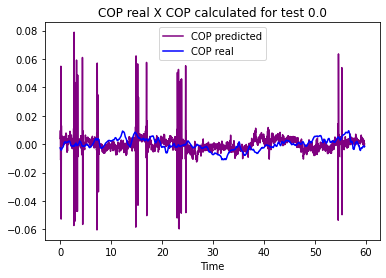

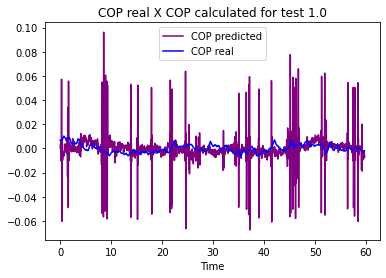

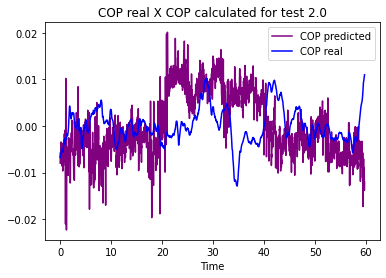

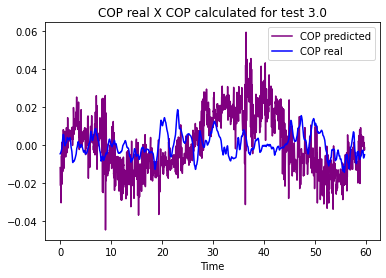

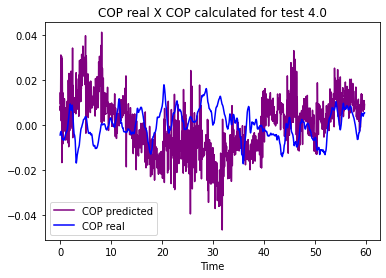

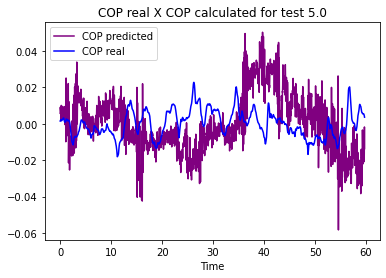

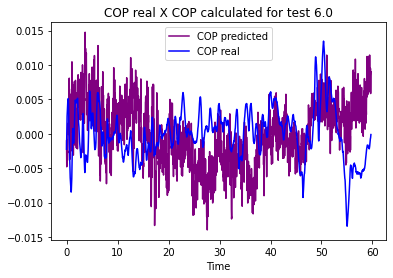

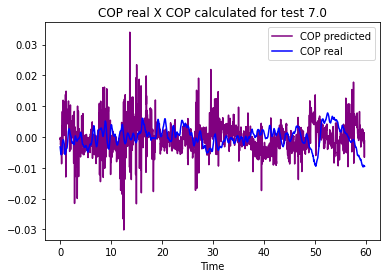

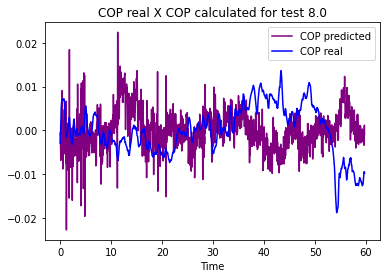

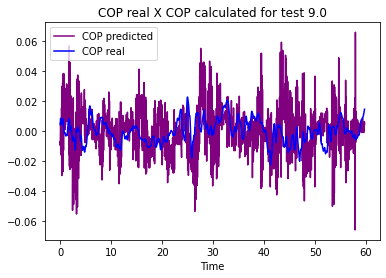

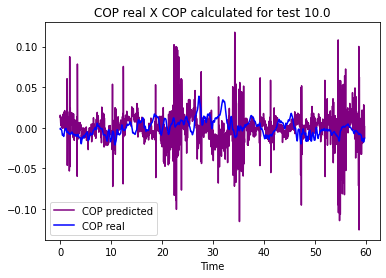

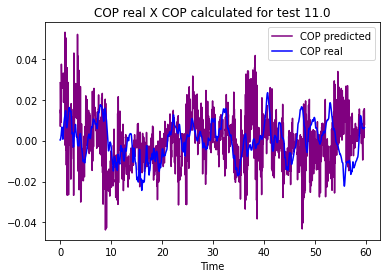

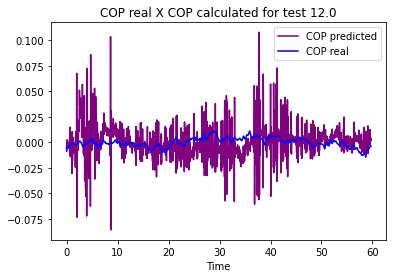

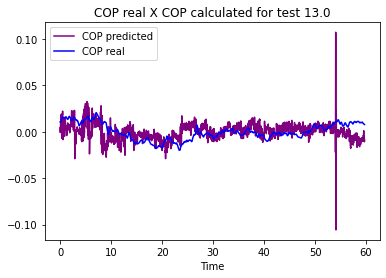

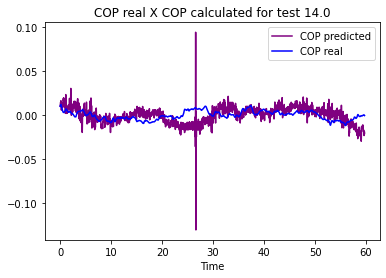

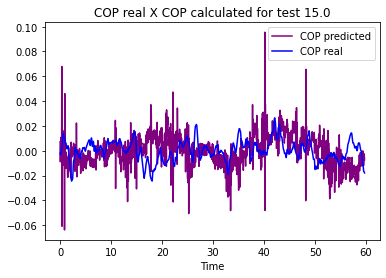

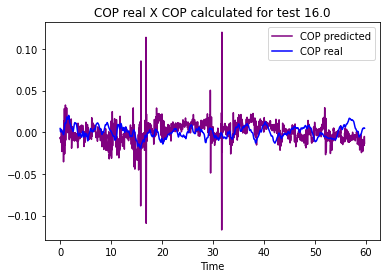

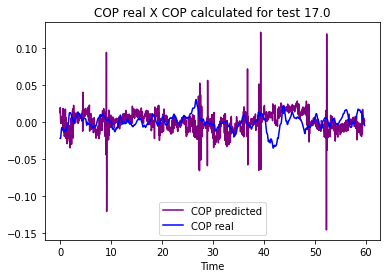

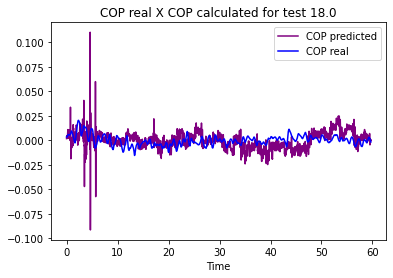

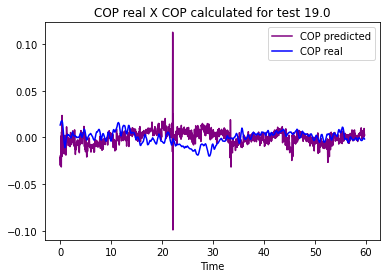

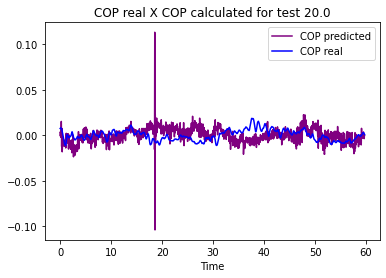

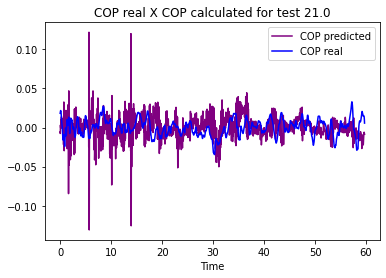

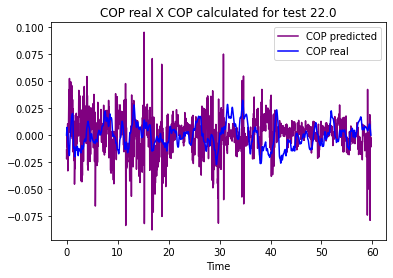

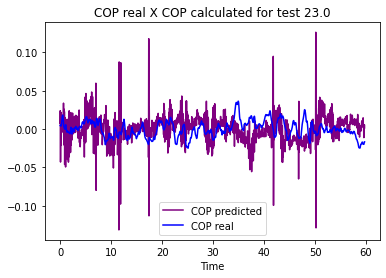

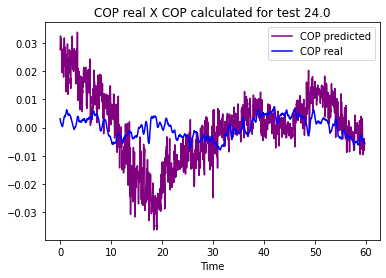

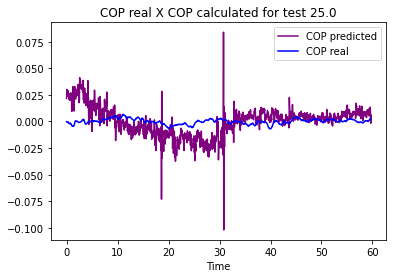

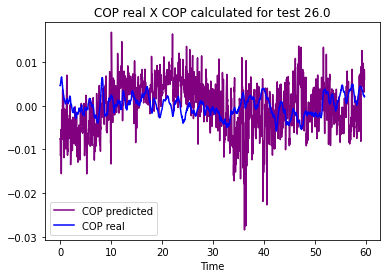

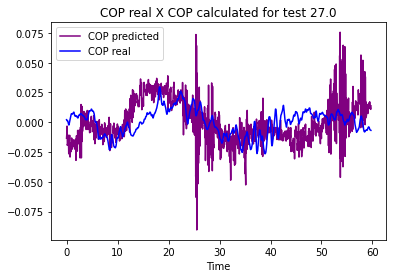

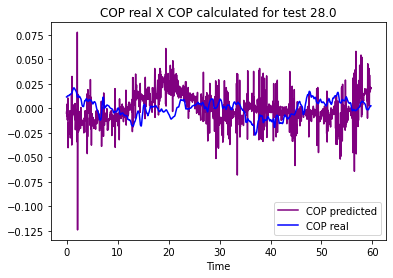

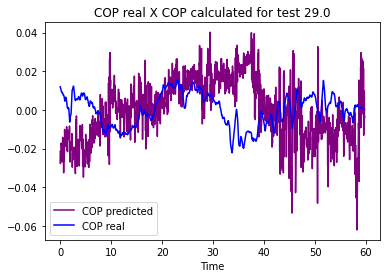

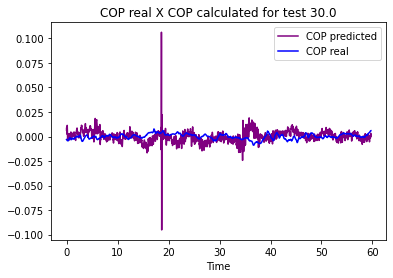

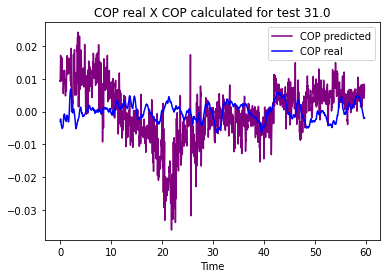

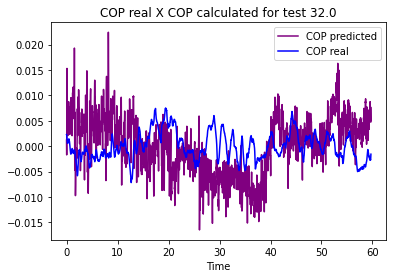

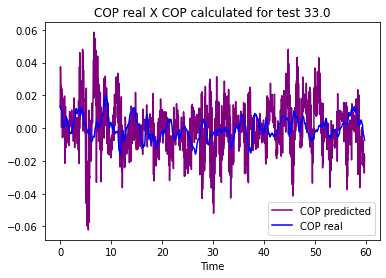

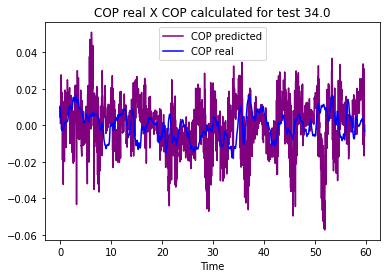

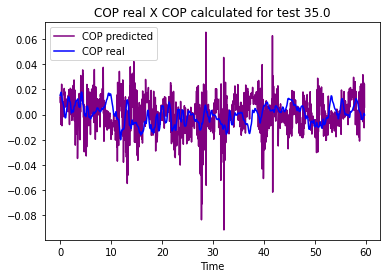

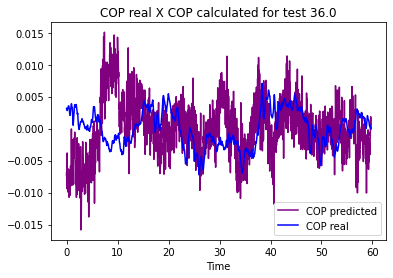

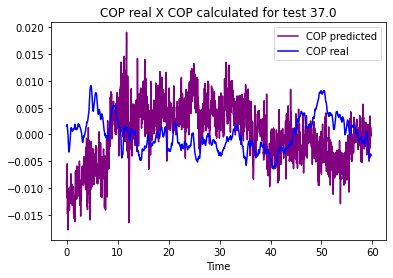

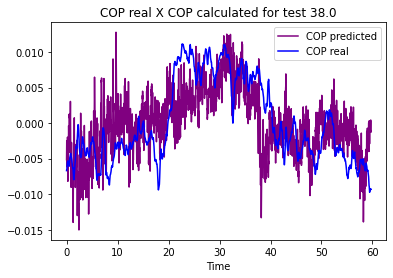

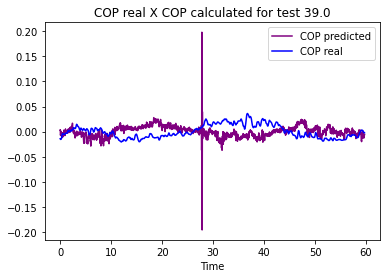

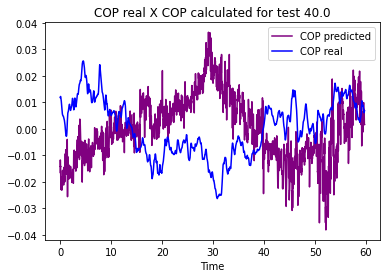

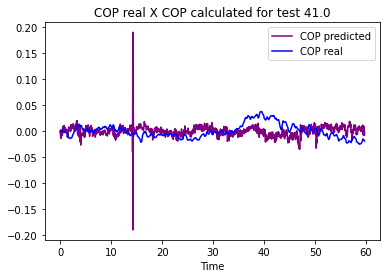

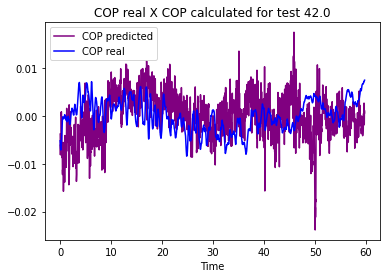

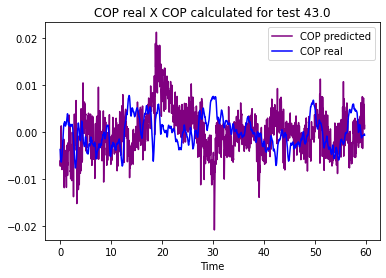

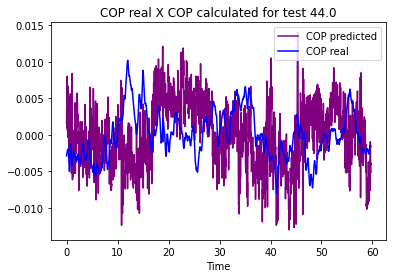

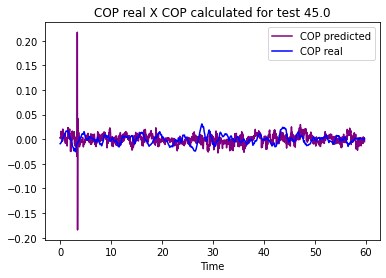

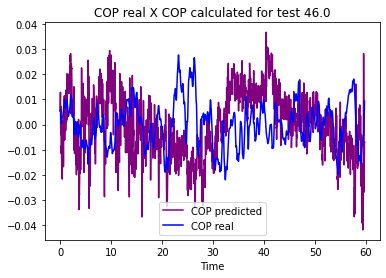

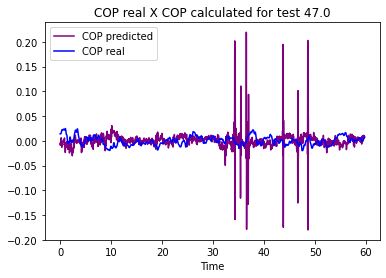

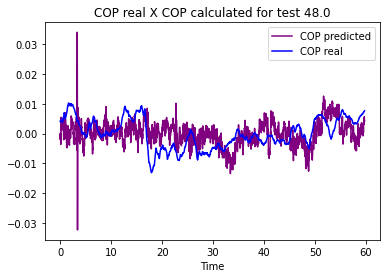

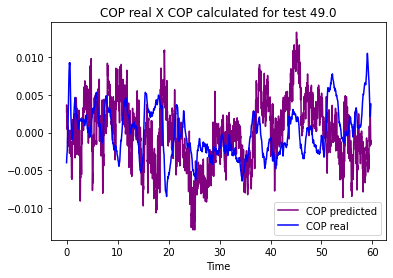

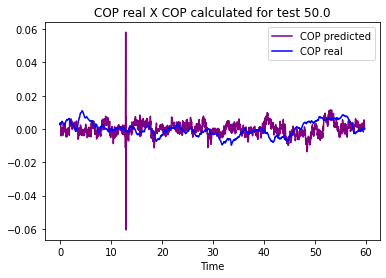

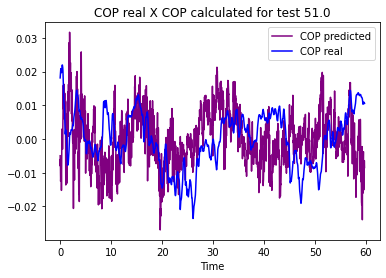

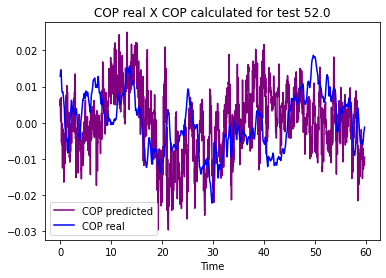

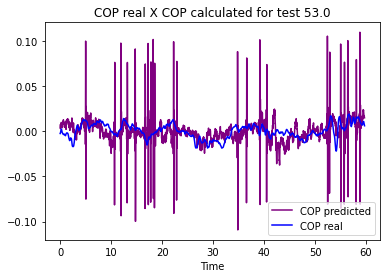

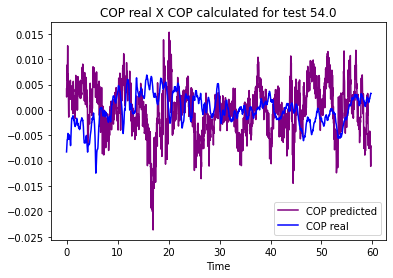

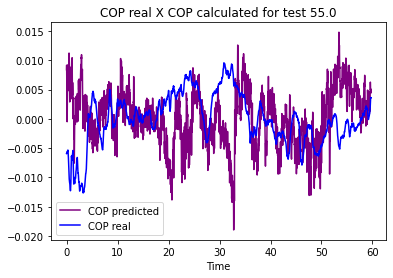

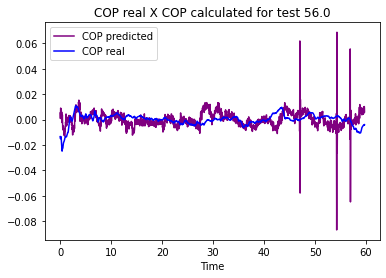

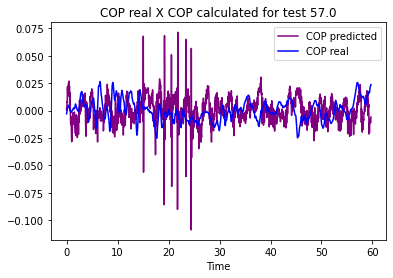

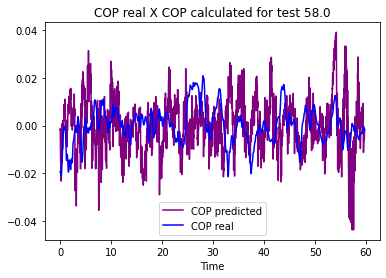

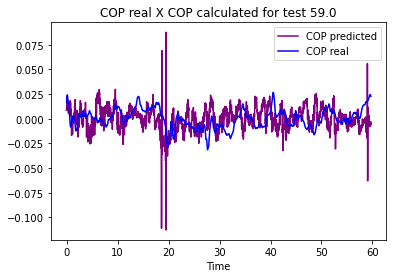

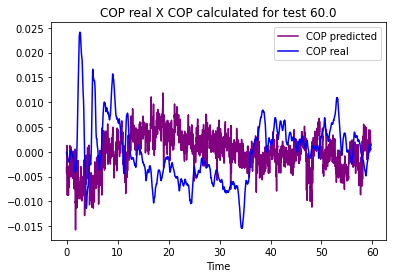

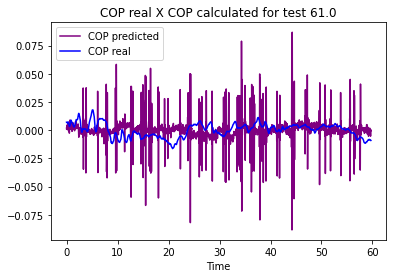

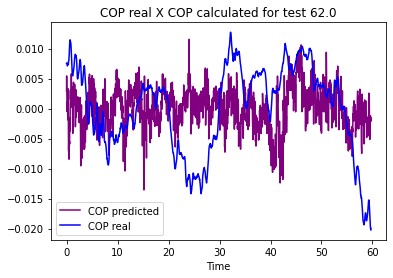

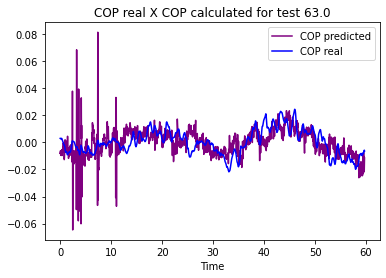

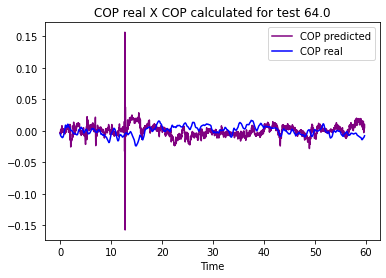

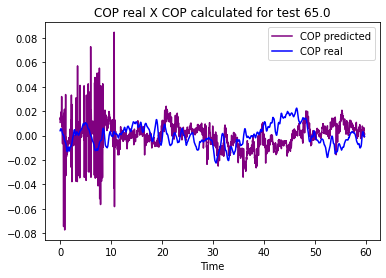

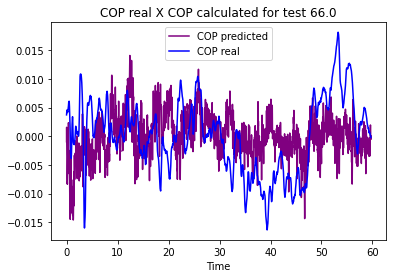

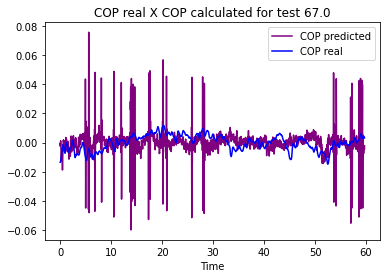

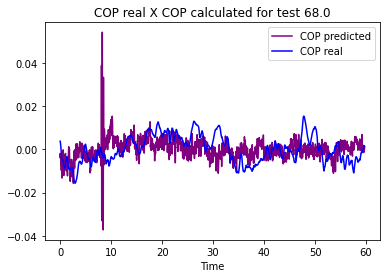

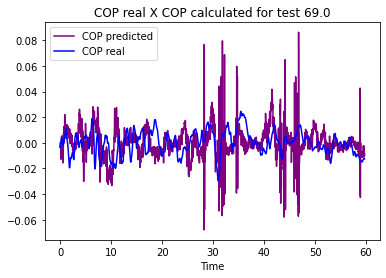

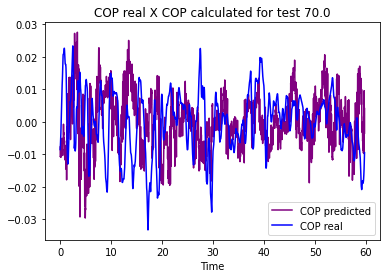

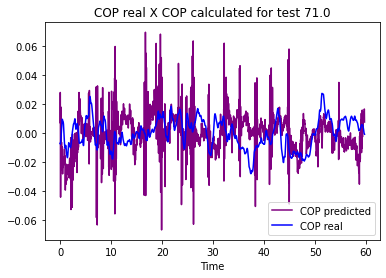

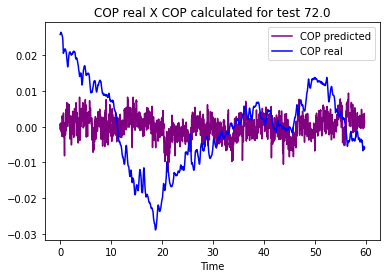

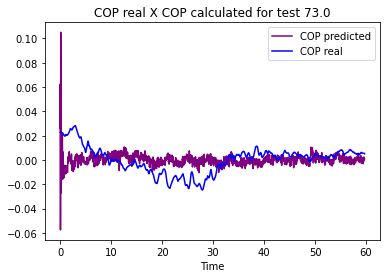

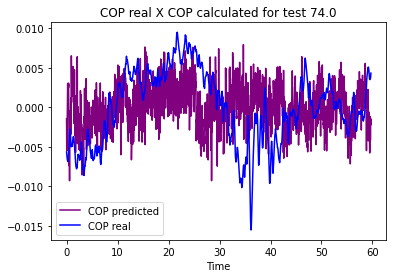

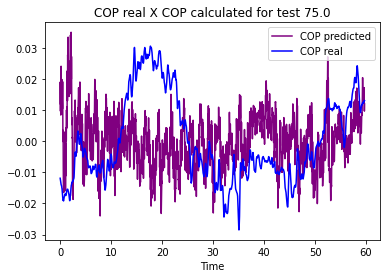

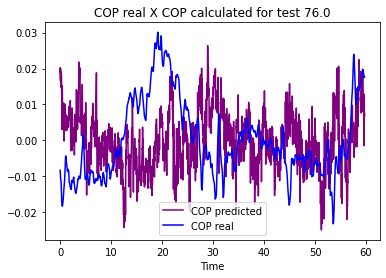

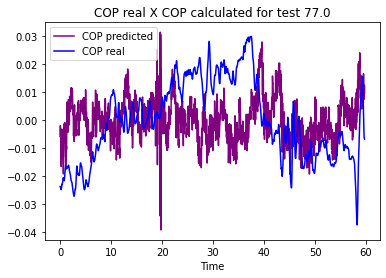

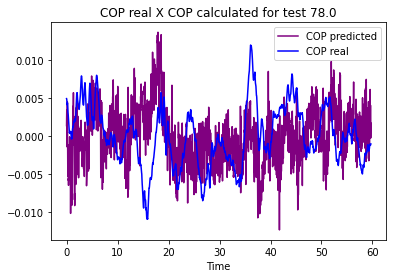

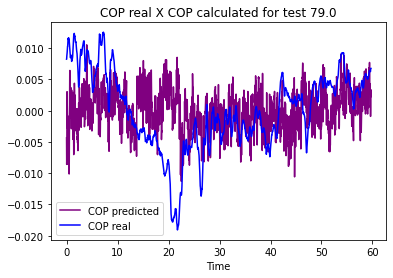

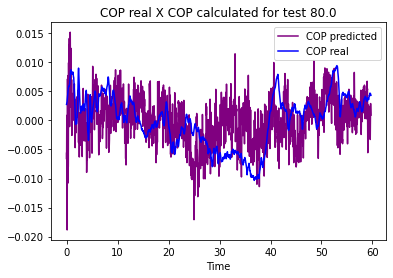

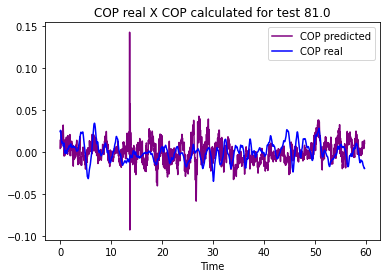

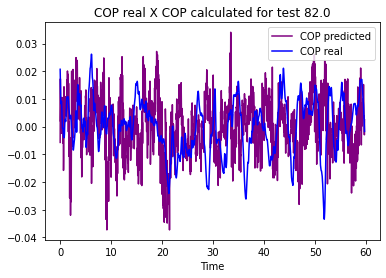

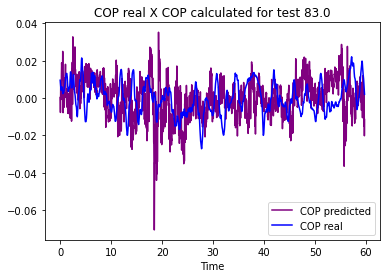

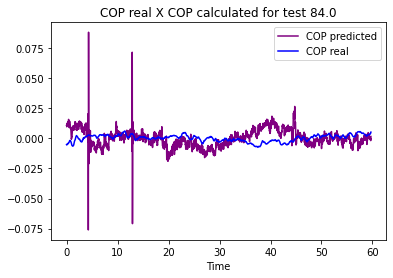

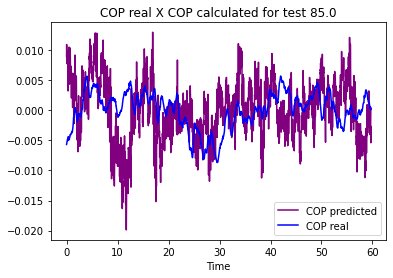

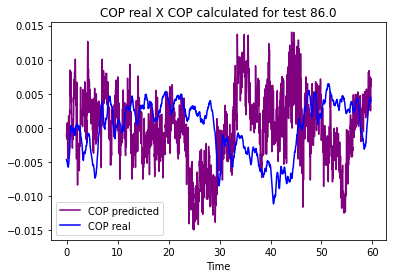

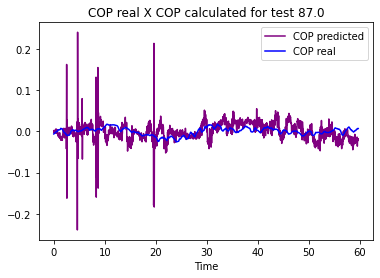

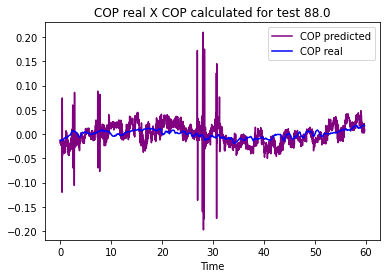

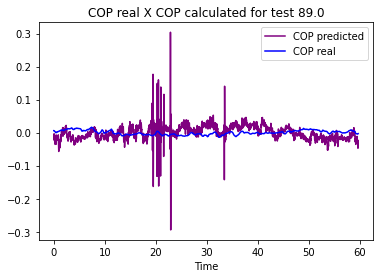

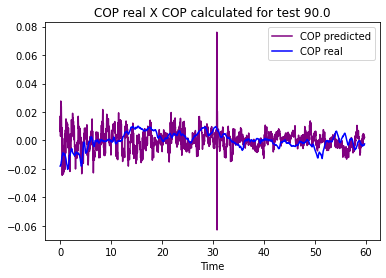

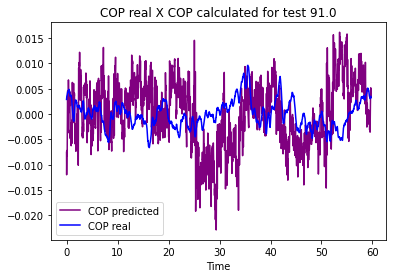

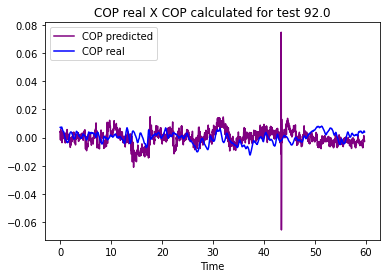

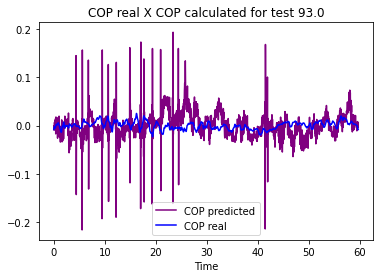

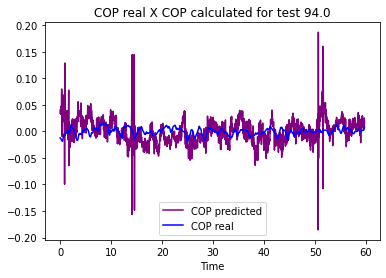

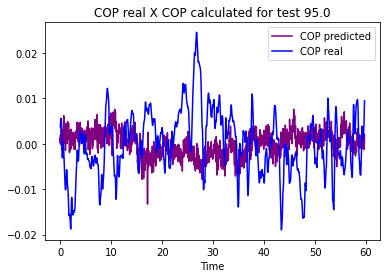

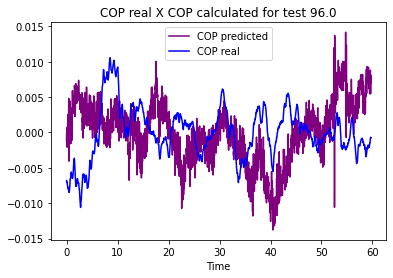

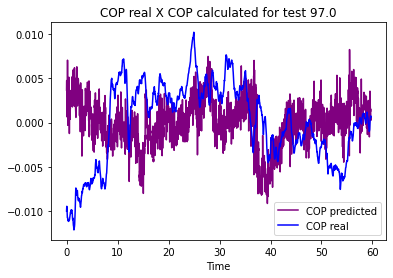

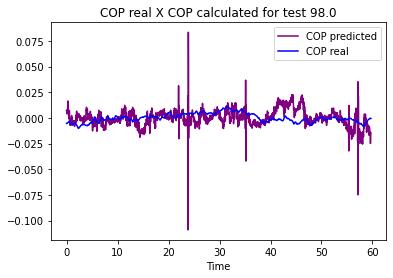

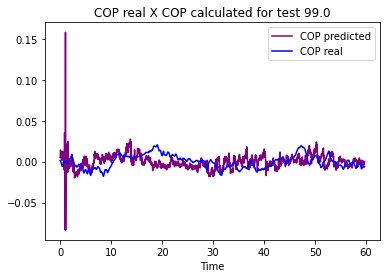

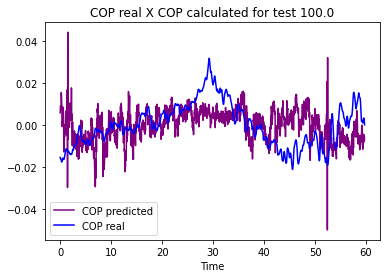

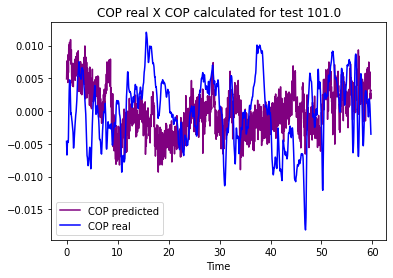

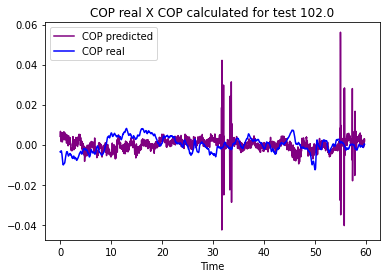

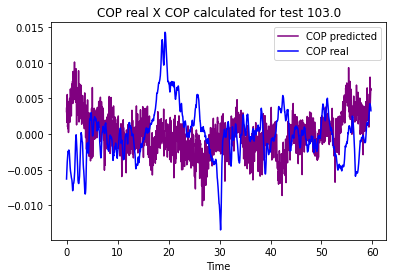

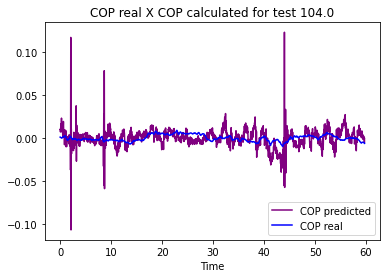

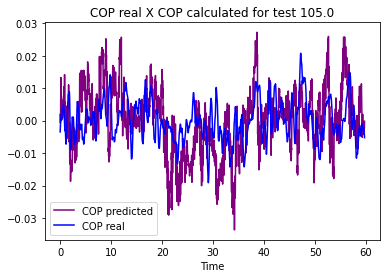

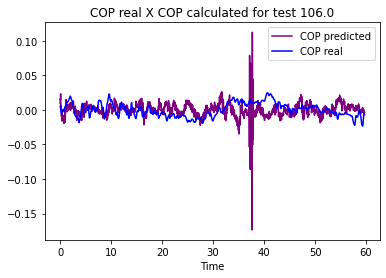

In [15]:
time = np.arange(0,6000)/100
for i in range(0,len(ASISXtest)):
    plt.figure()
    plt.plot(time[:5970],detrend(testando[i]),color='purple',label='COP predicted')
    plt.plot(time[:5970],detrend(COPXreal[i]),color='blue', label='COP real')
    plt.title('COP real X COP calculated for test {:.1f}'.format(i))
    plt.xlabel('Time')
    plt.legend()
    plt.show()

GTR

In [16]:
file = open('storegtr.pkl','rb')
(COPXreal,COPZreal,COPX,COPZ,d1x,d1z,d2x,d2z,matrizangx,matrizangz,COGX,COGY,COGZ,GTRX,GTRY,GTRZ,angulox,anguloz,d,alpha,subject,ei,sinx,sinz,cosx,cosz,tanx,tanz,COGXtrain,COGYtrain,COGZtrain,COGXtest,COGYtest,COGZtest,GTRXtrain,GTRYtrain,GTRZtrain,GTRXtest,GTRYtest,GTRZtest,COPXtrain,COPXtest,COPZtrain,COPZtest,train,test,masstrain,masstest,subjectp,subjectc,subjecta,t)= pickle.load(file)
file.close()

In [17]:
def newdist(paramt,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error
    dest = np.zeros((60*fs-30))
    d = np.zeros((60*fs-30))
    for i in range(0, len(x)):

        delta,mi = paramt

        d[i] = np.mean(np.sqrt(x[i]**2+y[i]**2+z[i]**2))

        dest[i] = delta * d[i] + mi


    return dest


In [18]:
#for i in range(0,len(COGXtrain)):

        #d= np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2)

def meansquarerrordist(paramt,d,GTRXtrain,GTRYtrain,GTRZtrain):
    d = np.zeros((60*fs-30))
    from sklearn.metrics import mean_squared_error
    ytrue = np.zeros((60*fs-30))
    ypredicted = np.zeros((60*fs-30))
    for i in range(0,len(GTRXtrain)):

        d[i] = np.mean(np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2))

        ytrue[i] = d[i]

        ypredicted = newdist(paramt,GTRXtrain,GTRYtrain,GTRZtrain)


    return mean_squared_error(ytrue, ypredicted)


In [19]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1]
res = minimize(meansquarerrordist, first_guess,(d,COGXtrain,COGYtrain,COGZtrain))
coeficientes = res.x
delta=coeficientes[0]
mi=coeficientes[1]
print(delta)
print(mi)

0.9999999931933411
-1.6944572522881174e-08


In [20]:
treino = newdist(coeficientes,COGXtrain,COGYtrain,COGZtrain)
teste = newdist(coeficientes,COGXtest,COGYtest,COGZtest)

In [21]:
def centerofpressure(paramt, M,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error

    A,alpha,beta, gama= paramt

    d = np.mean(np.sqrt(x**2+y**2+z**2))

    dest = delta * d + mi

    angulox = np.arcsin(np.tanh(x/dest))
    anguloz = np.arcsin(np.tanh(z/dest))
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.cos(angulox)
    cosz=np.cos(anguloz)
    tanx=np.tan(angulox)
    tanz=np.tan(anguloz)

    matrizangx = angulox
    matrizangz = anguloz


    sennovox = (sinx)*A + ((1-A**2)**1/2)*(cosx)

    cosnovox = (cosx)*A - ((1-A**2)**1/2)*(sinx)

    sennovoz = (sinz)*A + ((1-A**2)**1/2)*(cosz)


    cosnovoz = (cosz)*A - ((1-A**2)**1/2)*(sinz)

    Jb=(4/3)*(M)*((dest)**2)

    dt=t[1]-t[0]

    d1x=np.gradient(matrizangx,dt)
    d1z=np.gradient(matrizangz,dt)

    d2x=np.gradient(d1x,dt)
    d2z=np.gradient(d1z,dt)

    COPX = dest*sennovox + Jb/(M*9.8)*(sennovox*d1x**2-cosnovox*d2x)
    COPZ = dest*sennovoz + Jb/(M*9.8)*(sennovoz*d1z**2-cosnovoz*d2z)

    COPXES= alpha*(dest*np.tanh(sennovox) + ((Jb/(M*9.8))*np.tanh(sennovox)*d1x**2)) + d2x*(-alpha*np.tanh(cosnovox)*Jb/(M*9.8)+beta) + gama
    COPXESorig= COPX

    return COPXES

In [22]:
def meansquarerror(paramt,COPXtrain,masstrain,GTRXtrain,GTRYtrain,GTRZtrain):

    from sklearn.metrics import mean_squared_error

    ytrue = np.empty((len(COPXtrain), 60*fs-30))
    ypredicted = np.empty((len(COPXtrain),60*fs-30))
    A,alpha,beta, gama = paramt
    for i in range(0,len(GTRXtrain)):

        ytrue[i] = COPXtrain[i]

        ypredicted[i] = centerofpressure(paramt,masstrain[i],GTRXtrain[i],GTRYtrain[i],GTRZtrain[i])
    #print(np.any(np.isnan(GTRYtrain)))



    return mean_squared_error(ytrue.T, ypredicted.T)





In [23]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1,1,1]
res = minimize(meansquarerror, first_guess,(COPXtrain,masstrain,GTRXtrain,GTRYtrain,GTRZtrain))
coeficientes = res.x
A=coeficientes[0]
alpha=coeficientes[1]
beta=coeficientes[2]
gama=coeficientes[3]
print(A,alpha,beta,gama)

0.9597569526078713 0.8287950966215846 0.0389044710444615 0.11401126633096174


In [24]:

#treinando=centerofpressure(coeficientes, masstrain,ASISXtrain,ASISYtrain,ASISZtrain)
testando = np.empty((len(GTRXtest), 60*fs-30))
for i in range(0,len(GTRXtest)):
  testando[i]=centerofpressure(coeficientes, masstest[i],GTRXtest[i],GTRYtest[i],GTRZtest[i])
print(COPXreal)
print(testando)


[[0.227692 0.227531 0.227369 ... 0.217683 0.21766  0.217652]
 [0.232069 0.232028 0.23202  ... 0.228983 0.229023 0.22905 ]
 [0.226171 0.226215 0.22628  ... 0.239102 0.239199 0.239302]
 ...
 [0.277085 0.277023 0.276938 ... 0.289195 0.288959 0.288718]
 [0.255144 0.254539 0.25392  ... 0.261114 0.260709 0.260295]
 [0.260521 0.260606 0.260778 ... 0.277911 0.27788  0.277853]]
[[0.31237984 0.31245338 0.31229081 ... 0.31143746 0.30767216 0.30467994]
 [0.31874364 0.31914957 0.31955342 ... 0.31437984 0.31407901 0.31377615]
 [0.3109083  0.31047271 0.30972369 ... 0.31958114 0.31938328 0.31934213]
 ...
 [0.26176646 0.23942887 0.25396198 ... 0.35184016 0.35216672 0.35249523]
 [0.32809154 0.32865747 0.32935348 ... 0.33789026 0.33818731 0.33835265]
 [0.34518235 0.3446925  0.3436741  ... 0.35164262 0.34883315 0.34714033]]


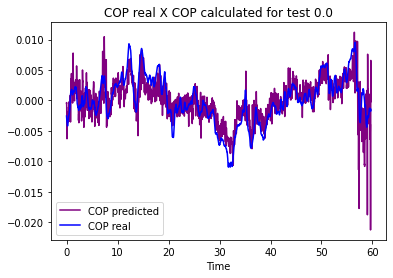

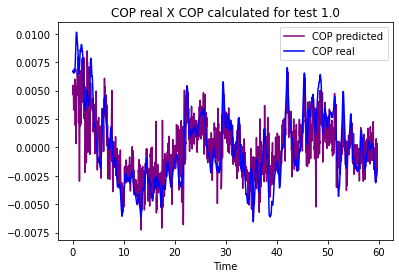

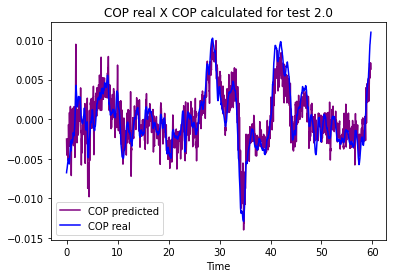

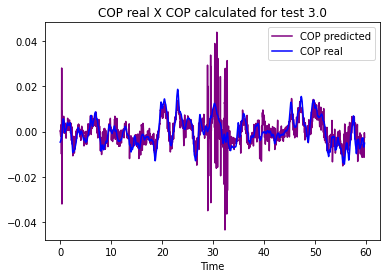

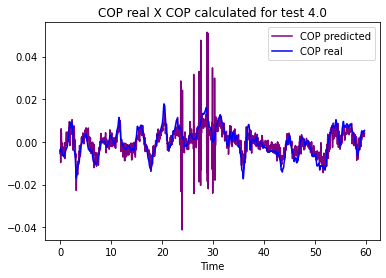

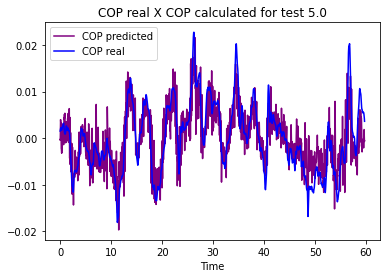

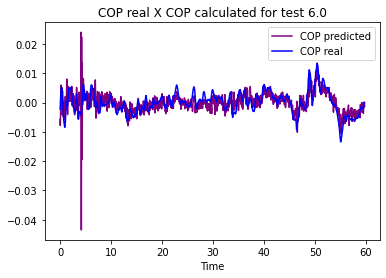

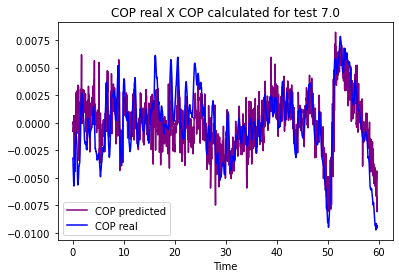

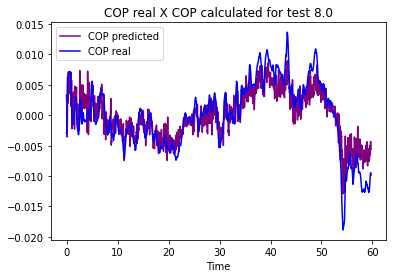

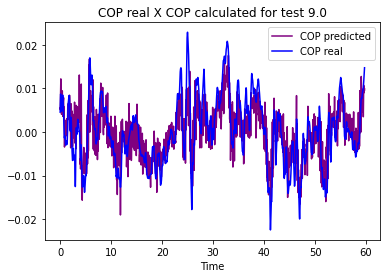

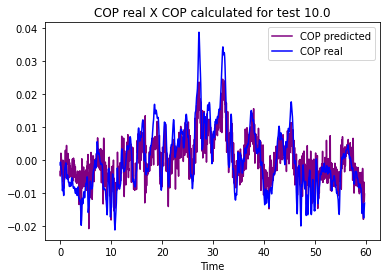

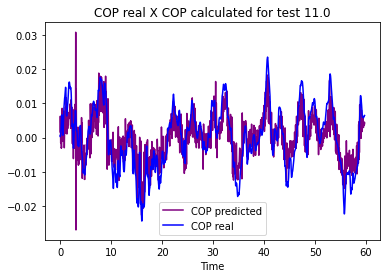

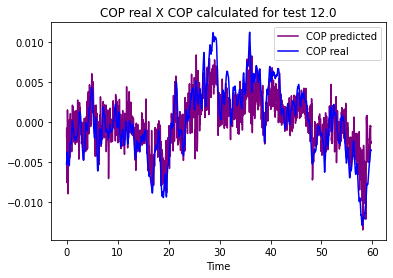

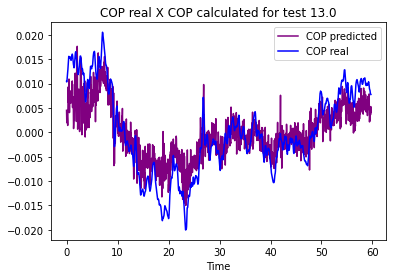

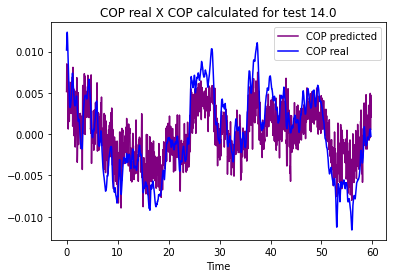

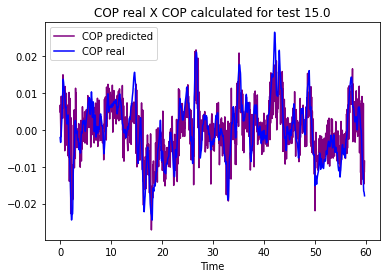

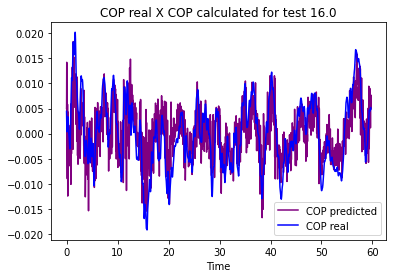

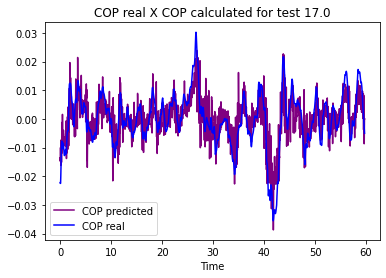

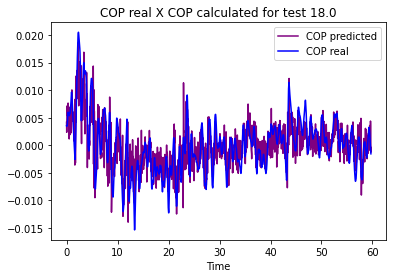

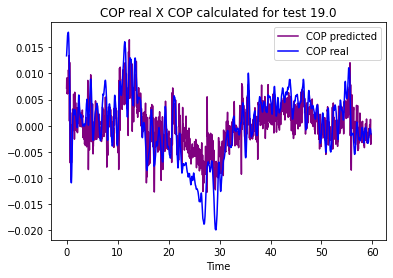

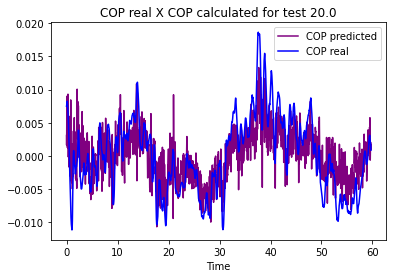

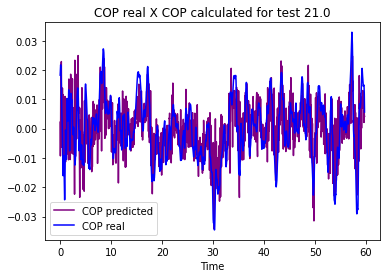

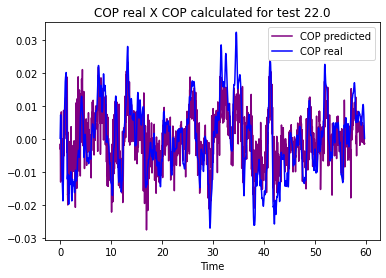

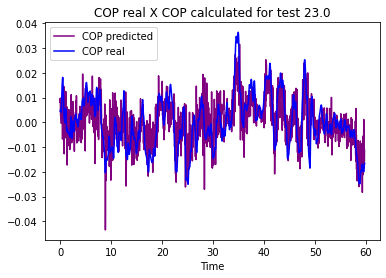

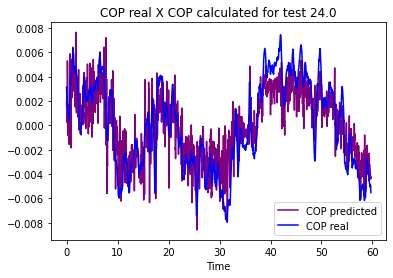

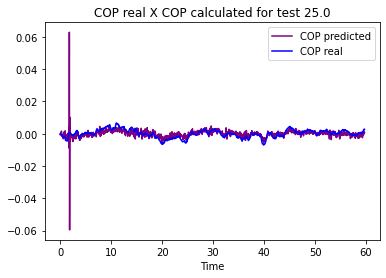

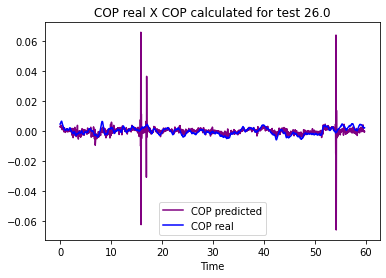

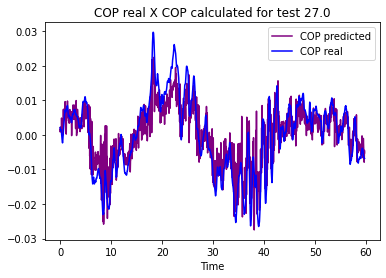

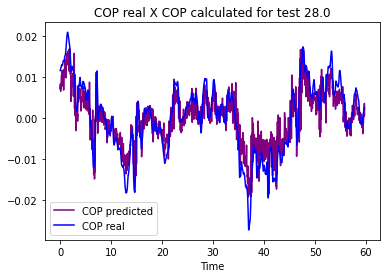

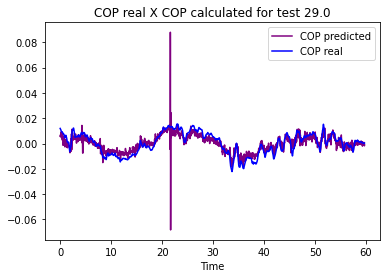

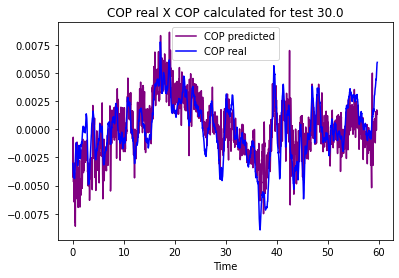

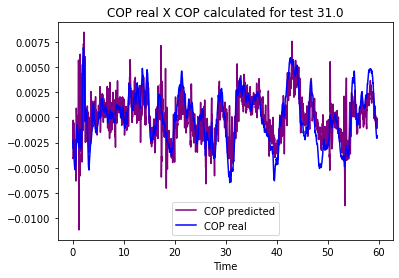

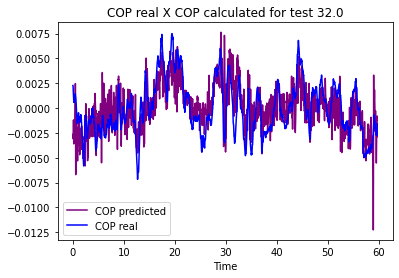

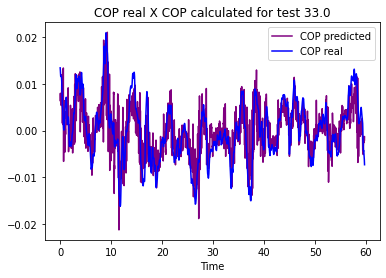

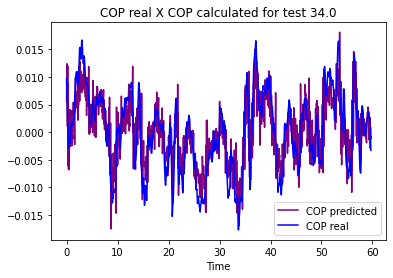

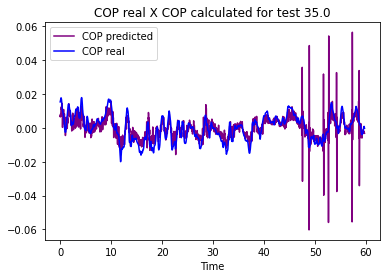

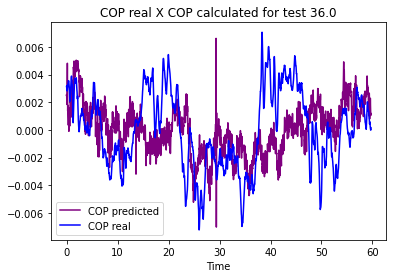

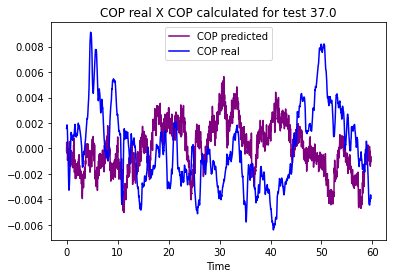

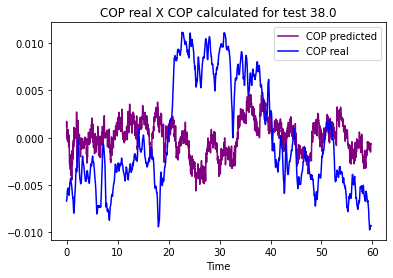

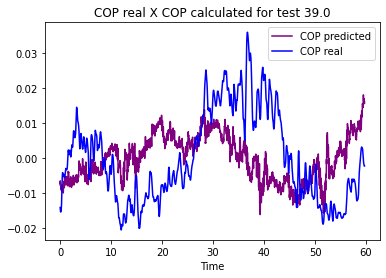

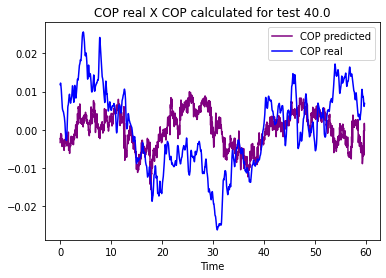

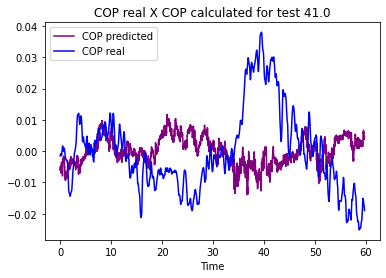

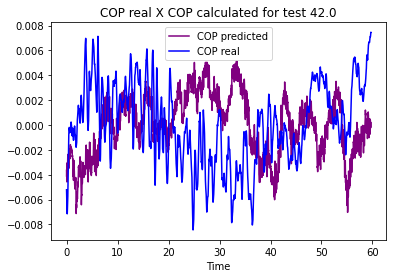

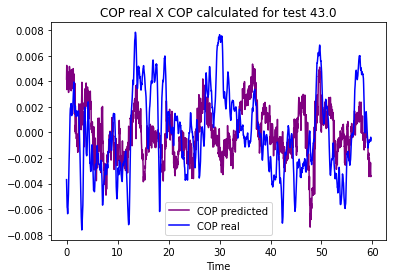

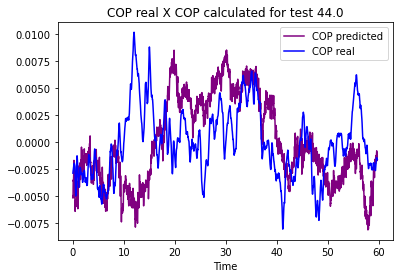

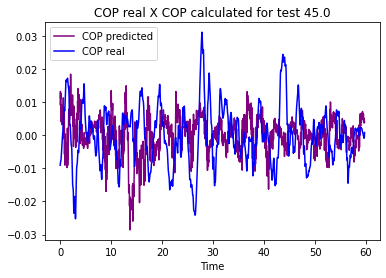

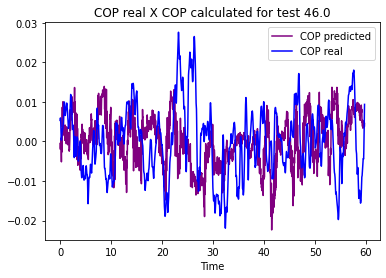

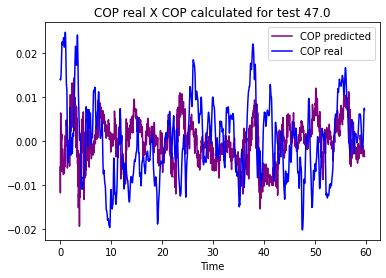

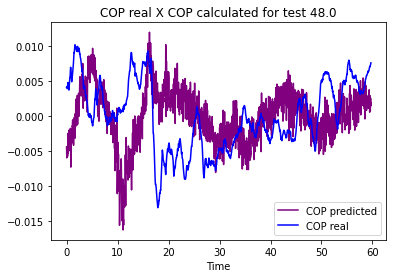

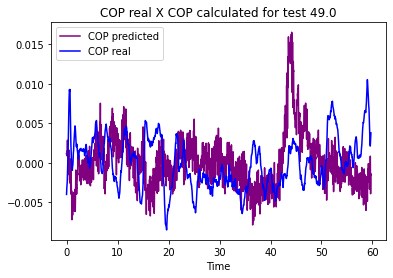

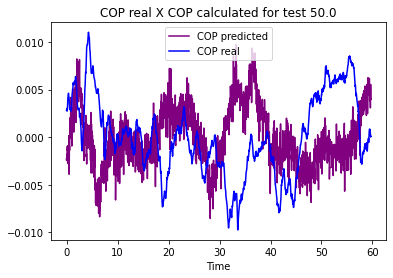

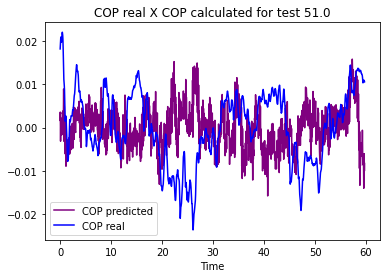

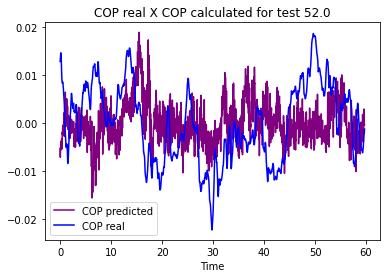

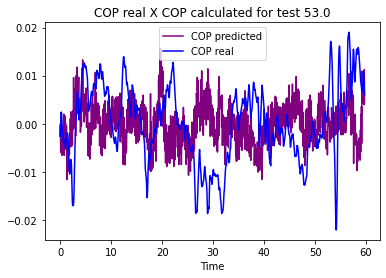

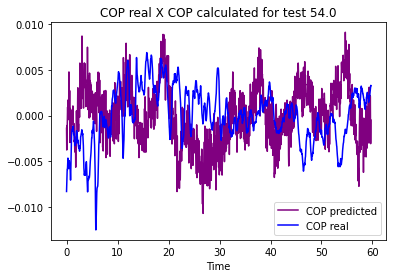

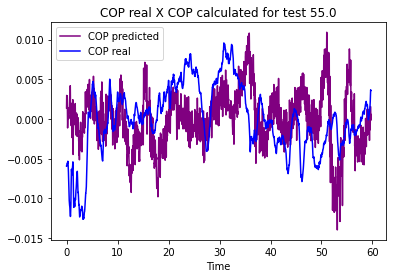

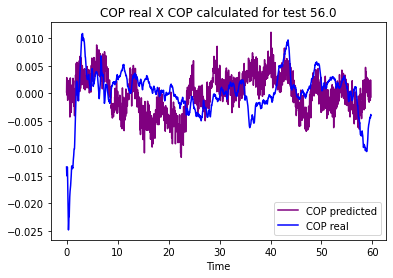

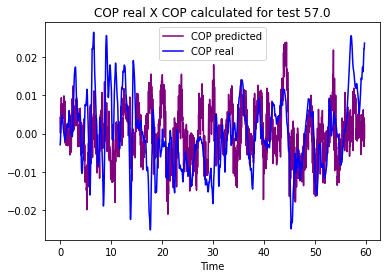

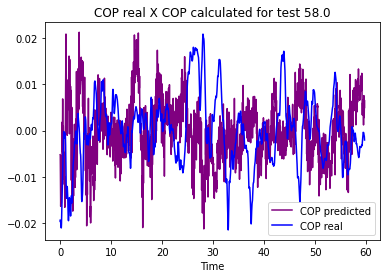

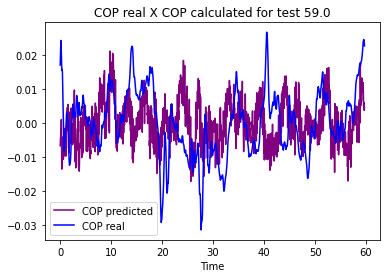

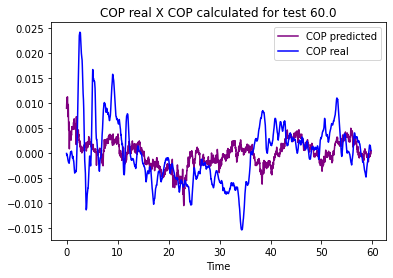

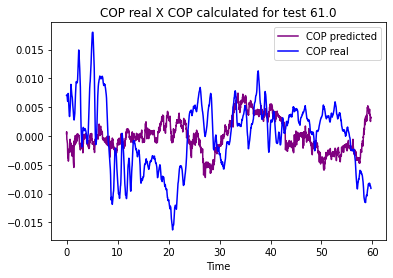

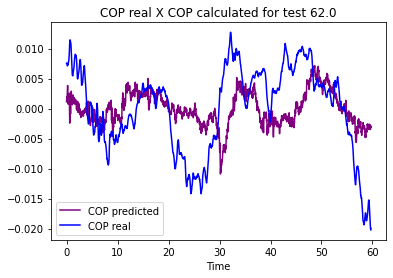

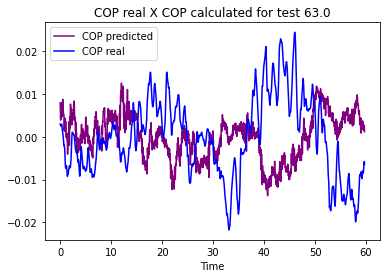

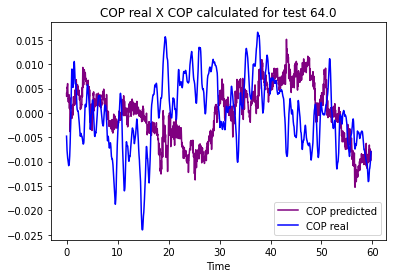

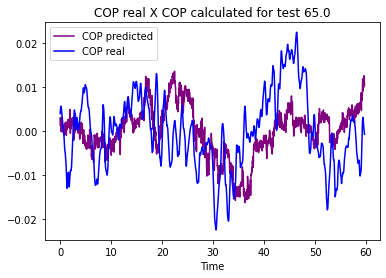

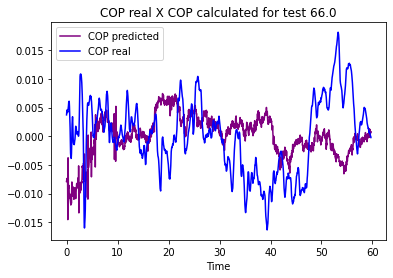

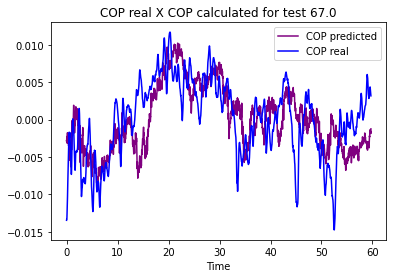

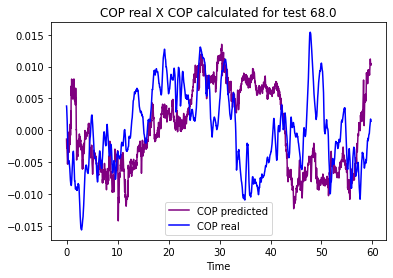

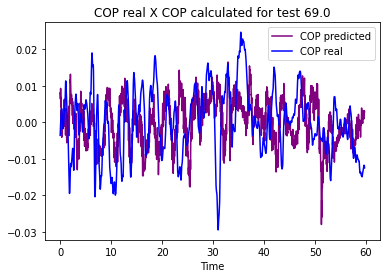

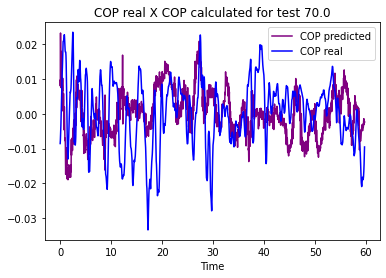

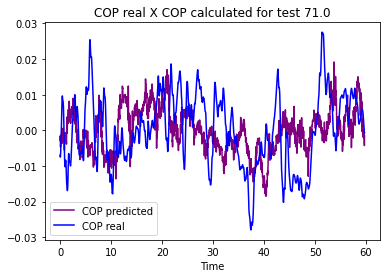

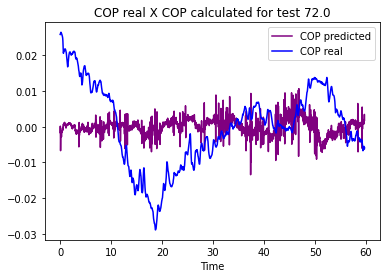

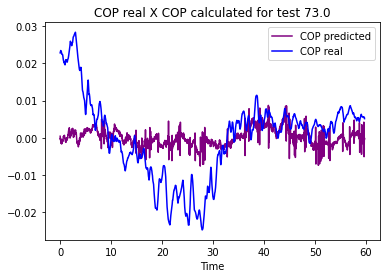

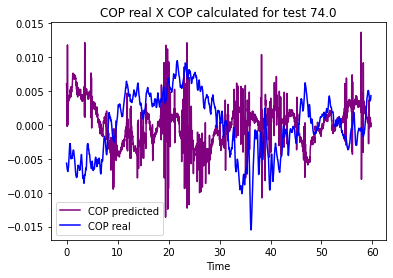

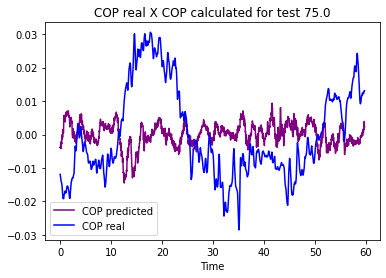

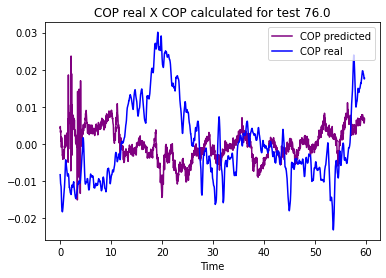

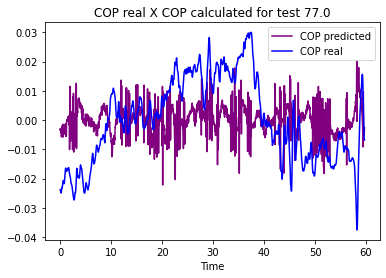

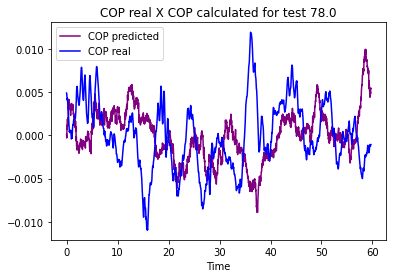

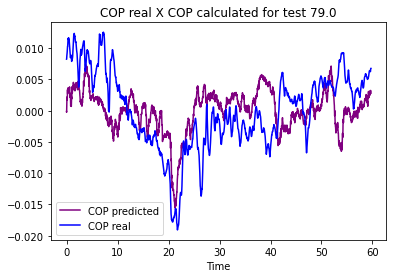

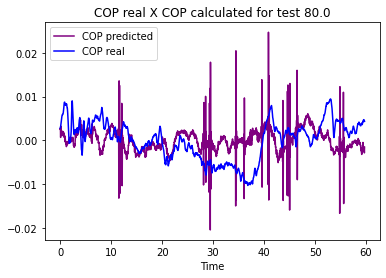

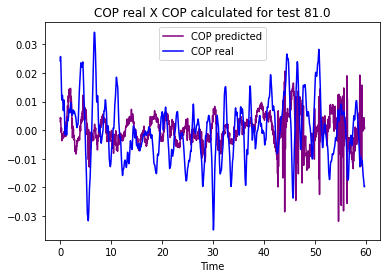

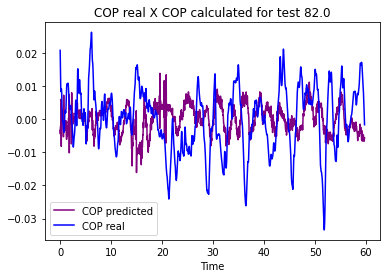

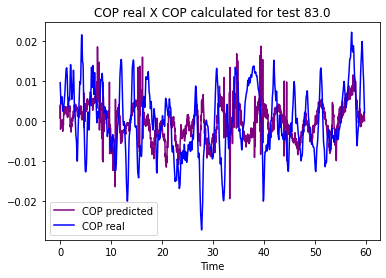

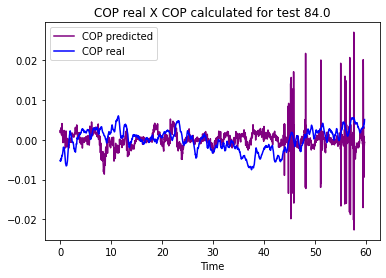

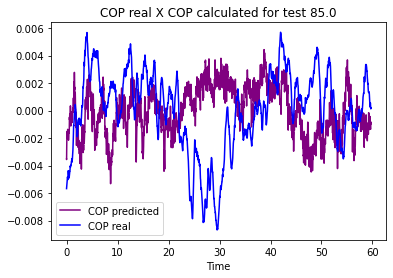

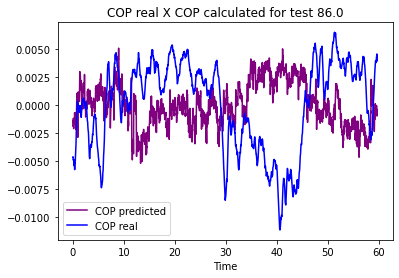

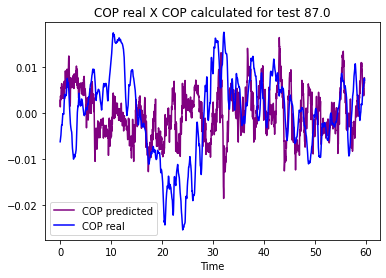

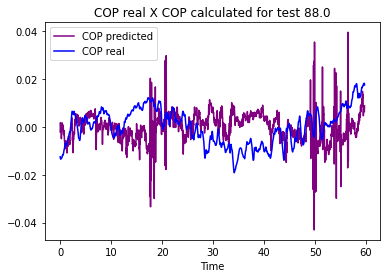

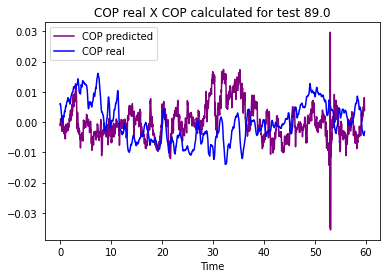

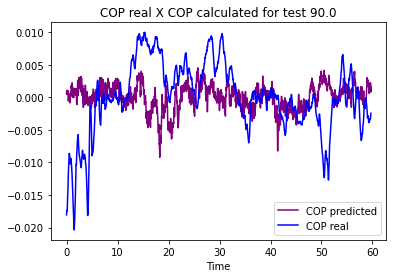

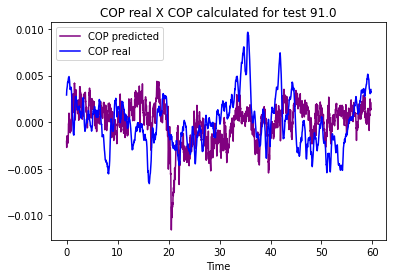

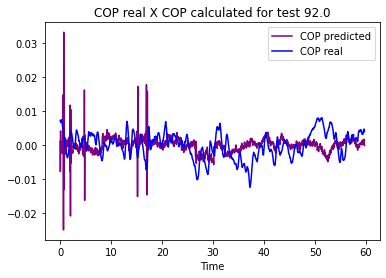

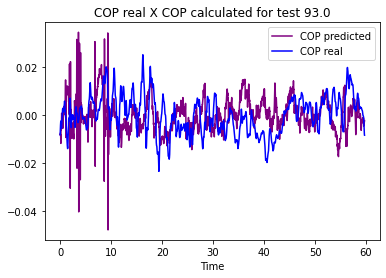

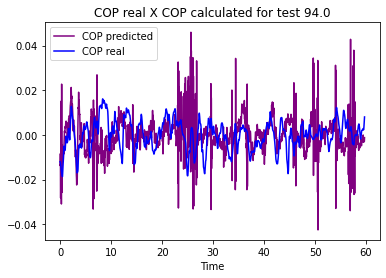

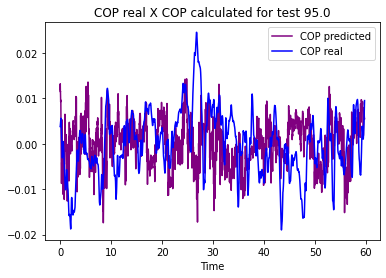

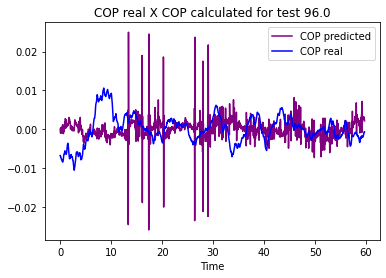

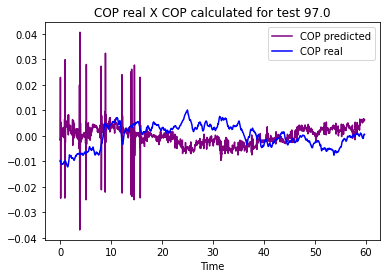

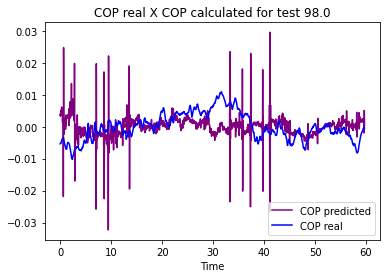

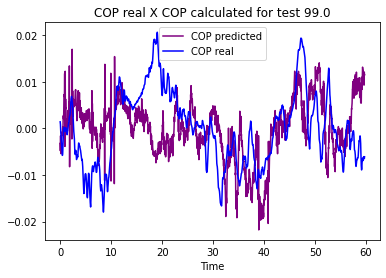

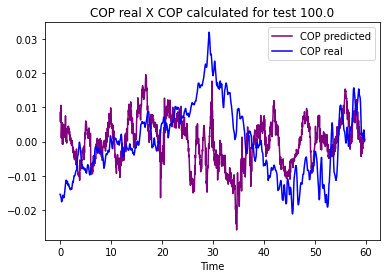

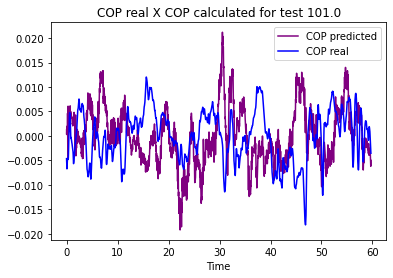

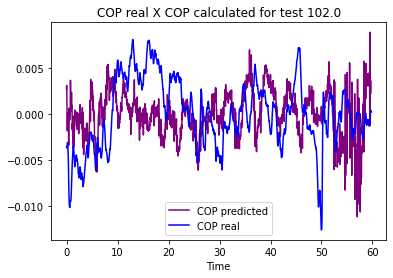

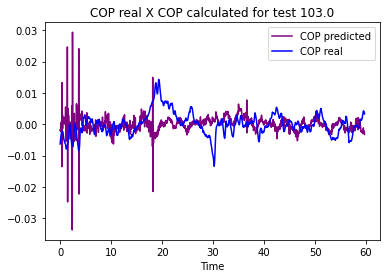

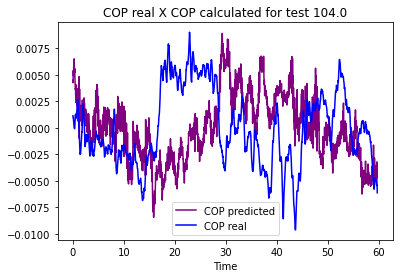

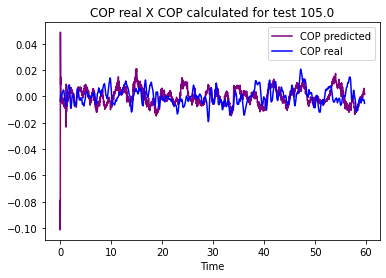

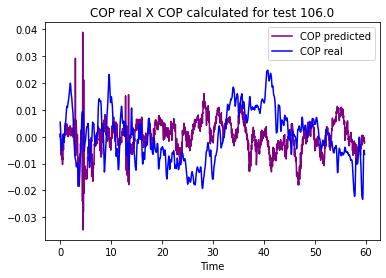

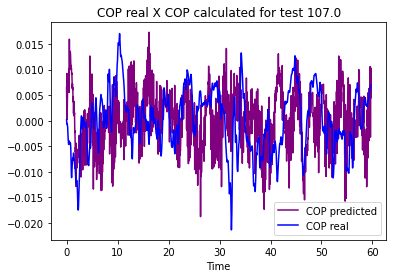

In [25]:
time = np.arange(0,6000)/100
for i in range(0,len(GTRXtest)):
    plt.figure()
    plt.plot(time[:5970],detrend(testando[i]),color='purple',label='COP predicted')
    plt.plot(time[:5970],detrend(COPXreal[i]),color='blue', label='COP real')
    plt.title('COP real X COP calculated for test {:.1f}'.format(i))
    plt.xlabel('Time')
    plt.legend()
    plt.show()

Iliac

In [26]:
file = open('storeili.pkl','rb')
(COPXreal,COPZreal,COPXi,COPZi,d1x,d1z,d2x,d2z,matrizangx,matrizangz,COGX,COGY,COGZ,ILIACX,ILIACY,ILIACZ,angulox,anguloz,d,alpha,subject,ei,sinx,sinz,cosx,cosz,tanx,tanz,COGXtrain,COGYtrain,COGZtrain,COGXtest,COGYtest,COGZtest,ILIACXtrain,ILIACYtrain,ILIACZtrain,ILIACXtest,ILIACYtest,ILIACZtest,COPXtrain,COPXtest,COPZtrain,COPZtest,train,test,masstrain,masstest,subjectp,subjectc,subjecta,t)= pickle.load(file)
file.close()

In [27]:
def newdist(paramt,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error
    dest = np.zeros((60*fs-30))
    d = np.zeros((60*fs-30))
    for i in range(0, len(x)):

        delta,mi = paramt

        d[i] = np.mean(np.sqrt(x[i]**2+y[i]**2+z[i]**2))

        dest[i] = delta * d[i] + mi


    return dest


In [28]:
#for i in range(0,len(COGXtrain)):

        #d= np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2)

def meansquarerrordist(paramt,d,ILIACXtrain,ILIACYtrain,ILIACZtrain):
    d = np.zeros((60*fs-30))
    from sklearn.metrics import mean_squared_error
    ytrue = np.zeros((60*fs-30))
    ypredicted = np.zeros((60*fs-30))
    for i in range(0,len(ILIACXtrain)):

        d[i] = np.mean(np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2))

        ytrue[i] = d[i]

        ypredicted = newdist(paramt,ILIACXtrain,ILIACYtrain,ILIACZtrain)


    return mean_squared_error(ytrue, ypredicted)


In [ ]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1]
res = minimize(meansquarerrordist, first_guess,(d,COGXtrain,COGYtrain,COGZtrain))
coeficientes = res.x
delta=coeficientes[0]
mi=coeficientes[1]
print(delta)
print(mi)

In [ ]:
treino = newdist(coeficientes,COGXtrain,COGYtrain,COGZtrain)
teste = newdist(coeficientes,COGXtest,COGYtest,COGZtest)

In [ ]:
def centerofpressure(paramt, M,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error

    A,alpha,beta, gama= paramt

    d = np.mean(np.sqrt(x**2+y**2+z**2))

    dest = delta * d + mi

    angulox = np.arcsin(np.tanh(x/dest))
    anguloz = np.arcsin(np.tanh(z/dest))
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.cos(angulox)
    cosz=np.cos(anguloz)
    tanx=np.tan(angulox)
    tanz=np.tan(anguloz)

    matrizangx = angulox
    matrizangz = anguloz


    sennovox = (sinx)*A + ((1-A**2)**1/2)*(cosx)

    cosnovox = (cosx)*A - ((1-A**2)**1/2)*(sinx)

    sennovoz = (sinz)*A + ((1-A**2)**1/2)*(cosz)


    cosnovoz = (cosz)*A - ((1-A**2)**1/2)*(sinz)

    Jb=(4/3)*(M)*((dest)**2)

    dt=t[1]-t[0]

    d1x=np.gradient(matrizangx,dt)
    d1z=np.gradient(matrizangz,dt)

    d2x=np.gradient(d1x,dt)
    d2z=np.gradient(d1z,dt)

    COPX = dest*sennovox + Jb/(M*9.8)*(sennovox*d1x**2-cosnovox*d2x)
    COPZ = dest*sennovoz + Jb/(M*9.8)*(sennovoz*d1z**2-cosnovoz*d2z)

    COPXES= alpha*(dest*np.tanh(sennovox) + ((Jb/(M*9.8))*np.tanh(sennovox)*d1x**2)) + d2x*(-alpha*np.tanh(cosnovox)*Jb/(M*9.8)+beta) + gama
    COPXESorig= COPX

    return COPXES

In [ ]:
def meansquarerror(paramt,COPXtrain,masstrain,ILIACXtrain,ILIACYtrain,ILIACZtrain):

    from sklearn.metrics import mean_squared_error

    ytrue = np.empty((len(COPXtrain), 60*fs-30))
    ypredicted = np.empty((len(COPXtrain),60*fs-30))
    A,alpha,beta, gama = paramt
    for i in range(0,len(ILIACXtrain)):

        ytrue[i] = COPXtrain[i]

        ypredicted[i] = centerofpressure(paramt,masstrain[i],ILIACXtrain[i],ILIACYtrain[i],ILIACZtrain[i])
    #print(np.any(np.isnan(GTRYtrain)))



    return mean_squared_error(ytrue.T, ypredicted.T)





In [ ]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1,1,1]
res = minimize(meansquarerror, first_guess,(COPXtrain,masstrain,ILIACXtrain,ILIACYtrain,ILIACZtrain))
coeficientes = res.x
A=coeficientes[0]
alpha=coeficientes[1]
beta=coeficientes[2]
gama=coeficientes[3]
print(A,alpha,beta,gama)

In [ ]:

#treinando=centerofpressure(coeficientes, masstrain,ASISXtrain,ASISYtrain,ASISZtrain)
testando = np.empty((len(ILIACXtest), 60*fs-30))
for i in range(0,len(ILIACXtest)):
  testando[i]=centerofpressure(coeficientes, masstest[i],ILIACXtest[i],ILIACYtest[i],ILIACZtest[i])
print(COPXreal)
print(testando)


In [ ]:
time = np.arange(0,6000)/100
for i in range(0,len(ILIACXtest)):
    plt.figure()
    plt.plot(time[:5970],detrend(testando[i]),color='purple',label='COP predicted')
    plt.plot(time[:5970],detrend(COPXreal[i]),color='blue', label='COP real')
    plt.title('COP real X COP calculated for test {:.1f}'.format(i))
    plt.xlabel('Time')
    plt.legend()
    plt.show()

Iliac

In [ ]:
file = open('storepsi.pkl','rb')
(COPXreal,COPZreal,COPXp,COPZp,d1x,d1z,d2x,d2z,matrizangx,matrizangz,COGX,COGY,COGZ,PSISX,PSISY,PSISZ,angulox,anguloz,d,alpha,subject,ei,sinx,sinz,cosx,cosz,tanx,tanz,COGXtrain,COGYtrain,COGZtrain,COGXtest,COGYtest,COGZtest,PSISXtrain,PSISYtrain,PSISZtrain,PSISXtest,PSISYtest,PSISZtest,COPXtrain,COPXtest,COPZtrain,COPZtest,train,test,masstrain,masstest,subjectp,subjectc,subjecta,t)= pickle.load(file)
file.close()

In [ ]:
def newdist(paramt,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error
    dest = np.zeros((60*fs-30))
    d = np.zeros((60*fs-30))
    for i in range(0, len(x)):

        delta,mi = paramt

        d[i] = np.mean(np.sqrt(x[i]**2+y[i]**2+z[i]**2))

        dest[i] = delta * d[i] + mi


    return dest


In [ ]:
#for i in range(0,len(COGXtrain)):

        #d= np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2)

def meansquarerrordist(paramt,d,PSISXtrain,PSISYtrain,PSISZtrain):
    d = np.zeros((60*fs-30))
    from sklearn.metrics import mean_squared_error
    ytrue = np.zeros((60*fs-30))
    ypredicted = np.zeros((60*fs-30))
    for i in range(0,len(PSISXtrain)):

        d[i] = np.mean(np.sqrt(COGXtrain[i]**2+COGYtrain[i]**2+COGZtrain[i]**2))

        ytrue[i] = d[i]

        ypredicted = newdist(paramt,PSISXtrain,PSISYtrain,PSISZtrain)


    return mean_squared_error(ytrue, ypredicted)


In [ ]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1]
res = minimize(meansquarerrordist, first_guess,(d,COGXtrain,COGYtrain,COGZtrain))
coeficientes = res.x
delta=coeficientes[0]
mi=coeficientes[1]
print(delta)
print(mi)

In [ ]:
treino = newdist(coeficientes,COGXtrain,COGYtrain,COGZtrain)
teste = newdist(coeficientes,COGXtest,COGYtest,COGZtest)

In [ ]:
def centerofpressure(paramt, M,x,y,z):
    from sklearn.model_selection import train_test_split
    from scipy.optimize import minimize, rosen, rosen_der
    from sklearn.metrics import mean_squared_error

    A,alpha,beta, gama= paramt

    d = np.mean(np.sqrt(x**2+y**2+z**2))

    dest = delta * d + mi

    angulox = np.arcsin(np.tanh(x/dest))
    anguloz = np.arcsin(np.tanh(z/dest))
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.cos(angulox)
    cosz=np.cos(anguloz)
    tanx=np.tan(angulox)
    tanz=np.tan(anguloz)

    matrizangx = angulox
    matrizangz = anguloz


    sennovox = (sinx)*A + ((1-A**2)**1/2)*(cosx)

    cosnovox = (cosx)*A - ((1-A**2)**1/2)*(sinx)

    sennovoz = (sinz)*A + ((1-A**2)**1/2)*(cosz)


    cosnovoz = (cosz)*A - ((1-A**2)**1/2)*(sinz)

    Jb=(4/3)*(M)*((dest)**2)

    dt=t[1]-t[0]

    d1x=np.gradient(matrizangx,dt)
    d1z=np.gradient(matrizangz,dt)

    d2x=np.gradient(d1x,dt)
    d2z=np.gradient(d1z,dt)

    COPX = dest*sennovox + Jb/(M*9.8)*(sennovox*d1x**2-cosnovox*d2x)
    COPZ = dest*sennovoz + Jb/(M*9.8)*(sennovoz*d1z**2-cosnovoz*d2z)

    COPXES= alpha*(dest*np.tanh(sennovox) + ((Jb/(M*9.8))*np.tanh(sennovox)*d1x**2)) + d2x*(-alpha*np.tanh(cosnovox)*Jb/(M*9.8)+beta) + gama
    COPXESorig= COPX

    return COPXES

In [ ]:
def meansquarerror(paramt,COPXtrain,masstrain,PSISXtrain,PSISYtrain,PSISZtrain):

    from sklearn.metrics import mean_squared_error

    ytrue = np.empty((len(COPXtrain), 60*fs-30))
    ypredicted = np.empty((len(COPXtrain),60*fs-30))
    A,alpha,beta, gama = paramt
    for i in range(0,len(PSISXtrain)):

        ytrue[i] = COPXtrain[i]

        ypredicted[i] = centerofpressure(paramt,masstrain[i],PSISXtrain[i],PSISYtrain[i],PSISZtrain[i])
    #print(np.any(np.isnan(GTRYtrain)))



    return mean_squared_error(ytrue.T, ypredicted.T)





In [ ]:
from sklearn.model_selection import train_test_split
#from scipy import optmize
from scipy.optimize import minimize, rosen, rosen_der
first_guess = [1,1,1,1]
res = minimize(meansquarerror, first_guess,(COPXtrain,masstrain,PSISXtrain,PSISYtrain,PSISZtrain))
coeficientes = res.x
A=coeficientes[0]
alpha=coeficientes[1]
beta=coeficientes[2]
gama=coeficientes[3]
print(A,alpha,beta,gama)

In [ ]:

#treinando=centerofpressure(coeficientes, masstrain,ASISXtrain,ASISYtrain,ASISZtrain)
testando = np.empty((len(PSISXtest), 60*fs-30))
for i in range(0,len(PSISXtest)):
  testando[i]=centerofpressure(coeficientes, masstest[i],PSISXtest[i],PSISYtest[i],PSISZtest[i])
print(COPXreal)
print(testando)


In [ ]:
time = np.arange(0,6000)/100
for i in range(0,len(PSISXtest)):
    plt.figure()
    plt.plot(time[:5970],detrend(testando[i]),color='purple',label='COP predicted')
    plt.plot(time[:5970],detrend(COPXreal[i]),color='blue', label='COP real')
    plt.title('COP real X COP calculated for test {:.1f}'.format(i))
    plt.xlabel('Time')
    plt.legend()
    plt.show()

Iliac